## **Análise Espectral (fft e harmônicos)**

![logo TRACTIAN](https://media-exp1.licdn.com/dms/image/C560BAQEupKOSn2BGzw/company-logo_200_200/0?e=1597881600&v=beta&t=pmtKm9PlrulB4rhiBpz9Zdf6BcbTAAD4uZf3Yz_TWTI)

[Mais informações sobre vibrações em máquinas? Clique aqui](https://tractian.com/desmistificando-analise-de-vibracao-em-maquinas/)


####**Desenvolvido por Igor Cleto**

Confira mais sobre o meu trabalho e portfólio de projetos em:  
https://www.linkedin.com/in/igorcleto/
e
https://github.com/cletoigor


In [0]:
#Importação de Bibliotecas
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Conversor EPOCH:
def EPOCH_Converter(EPOCH):
    EPOCH = time.strftime("%a, %d %b %Y %H:%M:%S %Z", time.localtime(int(EPOCH)))
    EPOCH = EPOCH.replace(" ","")

    day_week = EPOCH[:3]
    day_number = EPOCH[4:6]
    month = EPOCH[6:9]
    year = EPOCH[9:13]
    hour = EPOCH[13:21]

    date = tuple([day_week,day_number,month,year,hour])
    return date

In [4]:
teste = EPOCH_Converter(1589749360)
print(teste)

('Sun', '17', 'May', '2020', '21:02:40')


In [5]:
#Capturando o conjunto de 20 Datasets e realizando testes
file_names = tuple(os.listdir('/content/drive/My Drive/Colab Notebooks/Desafio TRACTIAN/Coletas-Geladeira/Coletas-Geladeira'))
print(file_names)
print(type(file_names))
print('Este é meu primeiro arquivo: ' + file_names[0])
len(file_names)

('1589686645-1589686713.csv', '1589682974-1589683028.csv', '1589679298-1589679343.csv', '1589708764-1589708830.csv', '1589730864-1589730930.csv', '1589738236-1589738304.csv', '1589719814-1589719881.csv', '1589749293-1589749360.csv', '1589734547-1589734613.csv', '1589716130-1589716198.csv', '1589723497-1589723562.csv', '1589697708-1589697775.csv', '1589745611-1589745678.csv', '1589690330-1589690396.csv', '1589694024-1589694091.csv', '1589712447-1589712513.csv', '1589705079-1589705146.csv', '1589727180-1589727247.csv', '1589701392-1589701458.csv', '1589741926-1589741992.csv')
<class 'tuple'>
Este é meu primeiro arquivo: 1589686645-1589686713.csv


20

In [6]:
#Criando o Dataset Principal
columns = ('x','y','z','numero_relatorio','dia_semana','dia','mes','ano','horario_inicio_coleta','horario_fim_coleta')
df_main = pd.DataFrame(columns=columns)
print(df_main)

Empty DataFrame
Columns: [x, y, z, numero_relatorio, dia_semana, dia, mes, ano, horario_inicio_coleta, horario_fim_coleta]
Index: []


In [0]:
#Tratando os Datasets da Coleta
i = 0
for dataset in file_names:
    df_coleta = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Desafio TRACTIAN/Coletas-Geladeira/Coletas-Geladeira/'+ file_names[i],header=None)
    df_coleta.columns = ['x','y','z','c']
    df_coleta.drop(['c'], axis=1,inplace=True)

    for line in dataset:
        df_coleta['numero_relatorio'] = i
        df_coleta['dia_semana'] = (EPOCH_Converter(file_names[i][0:10])[0])
        df_coleta['dia'] = (EPOCH_Converter(file_names[i][0:10])[1])
        df_coleta['mes'] = (EPOCH_Converter(file_names[i][0:10])[2])
        df_coleta['ano'] = (EPOCH_Converter(file_names[i][0:10])[3])
        df_coleta['horario_inicio_coleta'] = (EPOCH_Converter(file_names[i][0:10])[4])
        df_coleta['horario_fim_coleta'] = (EPOCH_Converter(file_names[i][11:21])[4])

    df_main = pd.concat([df_main,df_coleta])
    i=i+1

In [8]:
df_main.head()
#Dataframe padrão para análise exploratória das coletas
#Possibilidade de filtros por eixo do acelerometro, coleta(numero_relatorio), dia, mes, ano e horários.

,x,y,z,numero_relatorio,dia_semana,dia,mes,ano,horario_inicio_coleta,horario_fim_coleta
0,-9.80,-1.16,-2.83,0,Sun,17,May,2020,03:37:25,03:38:33
1,-9.85,-1.35,-1.37,0,Sun,17,May,2020,03:37:25,03:38:33
2,-9.24,-0.03,0.11,0,Sun,17,May,2020,03:37:25,03:38:33
3,-8.84,1.03,0.33,0,Sun,17,May,2020,03:37:25,03:38:33
4,-8.71,1.44,-0.55,0,Sun,17,May,2020,03:37:25,03:38:33


In [9]:
df_main.tail()

,x,y,z,numero_relatorio,dia_semana,dia,mes,ano,horario_inicio_coleta,horario_fim_coleta
12737,-9.28,-0.07,-1.23,19,Sun,17,May,2020,18:58:46,18:59:52
12738,-9.29,0.00,-1.14,19,Sun,17,May,2020,18:58:46,18:59:52
12739,-9.29,-0.00,-0.99,19,Sun,17,May,2020,18:58:46,18:59:52
12740,-9.22,-0.02,-1.15,19,Sun,17,May,2020,18:58:46,18:59:52
12741,-9.32,0.04,-1.08,19,Sun,17,May,2020,18:58:46,18:59:52


In [10]:
df_main['numero_relatorio'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19], dtype=object)

In [11]:
#Verificando a existência de dados nulos nas medições
df_main.isnull().sum()
#Coletas sem dados nulos
#Medição executada em 100% das solicitações

x                        0
y                        0
z                        0
numero_relatorio         0
dia_semana               0
dia                      0
mes                      0
ano                      0
horario_inicio_coleta    0
horario_fim_coleta       0
dtype: int64

In [12]:
df_main.describe()
#Baixo desvio padrão
#Homogeniedade entre as coletas

,x,y,z
count,255125.000000,255125.000000,255125.000000
mean,-9.284836,0.005739,-1.137486
std,0.285014,0.674169,0.789193
min,-11.770000,-1.980000,-4.990000
25%,-9.320000,-0.030000,-1.190000
50%,-9.280000,0.010000,-1.120000
75%,-9.240000,0.050000,-1.060000
max,-6.740000,1.980000,3.570000


Text(0.5, 1.0, 'VIBRAÇÃO COMPLETA')

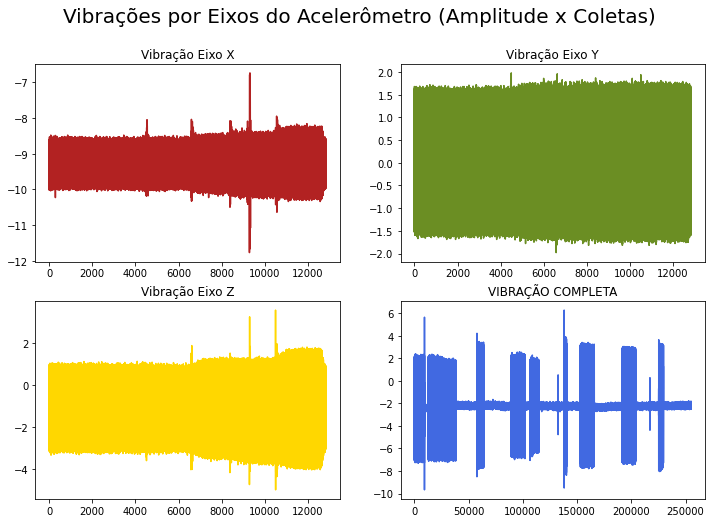

In [13]:
#Visualização das Coletas
s = np.array(df_main['z']) + np.array(df_main['y']) + np.array(df_main['z'])
fig1, f1_axes = plt.subplots(ncols=2,nrows=2,figsize=(12,8))
fig1.suptitle('Vibrações por Eixos do Acelerômetro (Amplitude x Coletas)',size=20)

f1_axes[0,0].plot(df_main['x'],color='firebrick')
f1_axes[0,0].set_title('Vibração Eixo X')

f1_axes[0,1].plot(df_main['y'],color='olivedrab')
f1_axes[0,1].set_title('Vibração Eixo Y')

f1_axes[1,0].plot(df_main['z'],color='gold')
f1_axes[1,0].set_title('Vibração Eixo Z')

f1_axes[1,1].plot(s,color='royalblue')
f1_axes[1,1].set_title('VIBRAÇÃO COMPLETA')

#Identificação de alguns outliers - principalmente para o eixo X


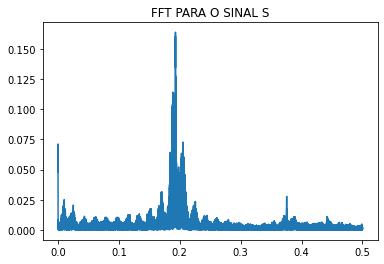

In [14]:
s = np.array(df_main['z']) + np.array(df_main['y']) + np.array(df_main['z'])
freq = np.fft.fftfreq(len(s))
mask = freq > 0

fft = np.fft.fft(s)
fft_abs = 2.0*np.abs(fft/(len(s)))

plt.figure(1)
plt.title('FFT PARA O SINAL S')
plt.plot(freq[mask],fft_abs[mask])
plt.show()